In [1]:
import kagglehub
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score
import pickle
import json

print("Iniciando proceso de entrenamiento del modelo de predicción de bancarrota...")

Iniciando proceso de entrenamiento del modelo de predicción de bancarrota...


In [2]:
# 1. Cargar los datos
print("Descargando y cargando conjunto de datos...")
path = kagglehub.dataset_download("fedesoriano/company-bankruptcy-prediction")
data = pd.read_csv(path+"/data.csv")

print(f"Dataset cargado con {data.shape[0]} filas y {data.shape[1]} columnas.")

# Mostrar las primeras filas para explorar
data.head()

Descargando y cargando conjunto de datos...


100%|██████████| 4.63M/4.63M [00:00<00:00, 14.5MB/s]

Extracting model files...


Dataset cargado con 6819 filas y 96 columnas.


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
# 2. Verificar si hay valores nulos
null_counts = data.isnull().sum()
print("Valores nulos por columna:")
print(null_counts[null_counts > 0])  # Solo muestra columnas con valores nulos

if null_counts.sum() > 0:
    print("Se encontraron valores nulos en el conjunto de datos. Reemplazando con la media...")
    # Rellenar valores nulos con la media para columnas numéricas
    for col in data.select_dtypes(include=['float64', 'int64']).columns:
        if data[col].isnull().sum() > 0:
            data[col].fillna(data[col].mean(), inplace=True)

# Verificar distribución de la variable objetivo
print(f"Distribución de clases en el conjunto de datos:")
print(data["Bankrupt?"].value_counts())
print(f"Porcentaje de empresas en bancarrota: {100 * data['Bankrupt?'].mean():.2f}%")

Valores nulos por columna:
Series([], dtype: int64)
Distribución de clases en el conjunto de datos:
0    6599
1     220
Name: Bankrupt?, dtype: int64
Porcentaje de empresas en bancarrota: 3.23%


In [4]:
# 3. Separar características y etiqueta objetivo
X = data.drop(["Bankrupt?"], axis=1)
y = data["Bankrupt?"]

# 4. Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Datos divididos: {X_train.shape[0]} registros para entrenamiento, {X_test.shape[0]} para prueba")

Datos divididos: 5455 registros para entrenamiento, 1364 para prueba


In [5]:
# 5. Entrenar el modelo
print("Entrenando modelo de Regresión Logística...")
# Usamos class_weight='balanced' para manejar el desbalance de clases
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

Entrenando modelo de Regresión Logística...


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [6]:
# 6. Evaluar el modelo
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

print("\nResultados del modelo:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nInforme detallado de clasificación:")
print(classification_report(y_test, y_pred))


Resultados del modelo:
Accuracy: 0.7478
ROC AUC: 0.6220

Informe detallado de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.76      0.85      1320
           1       0.05      0.36      0.09        44

    accuracy                           0.75      1364
   macro avg       0.51      0.56      0.47      1364
weighted avg       0.94      0.75      0.83      1364




Umbral óptimo encontrado: 0.5500 (F1-score: 0.0989)


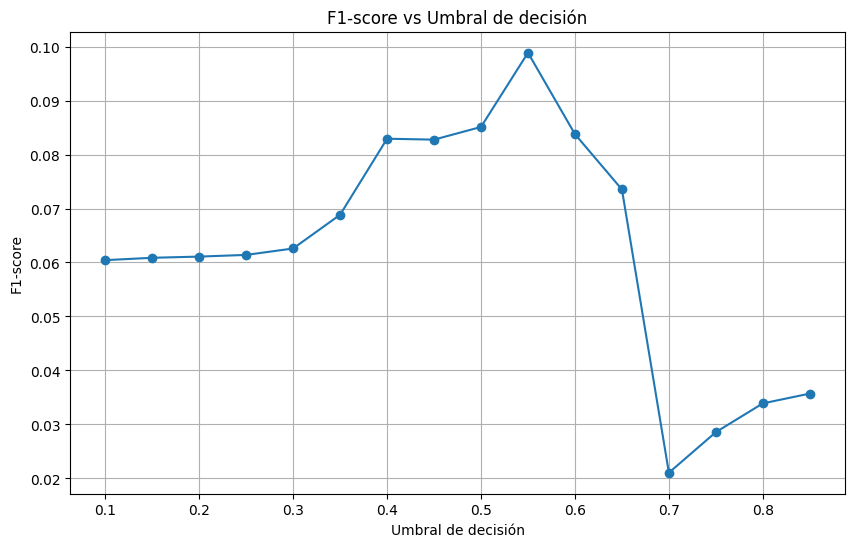

In [7]:
# 7. Calcular un umbral óptimo para maximizar F1-score
# Este es un enfoque simple para encontrar el mejor umbral
thresholds = np.arange(0.1, 0.9, 0.05)
best_f1 = 0
best_threshold = 0.5  # Valor predeterminado

results = []
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_threshold)
    results.append({"threshold": threshold, "f1_score": f1})
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"\nUmbral óptimo encontrado: {best_threshold:.4f} (F1-score: {best_f1:.4f})")

# Visualizar los resultados (opcional)
import matplotlib.pyplot as plt
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
plt.plot(results_df['threshold'], results_df['f1_score'], marker='o')
plt.xlabel('Umbral de decisión')
plt.ylabel('F1-score')
plt.title('F1-score vs Umbral de decisión')
plt.grid(True)
plt.show()

In [8]:
# 8. Guardar el modelo y el umbral
print("\nGuardando modelo y umbral...")

# Guardar el modelo
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Guardar el umbral como JSON
umbral_json = json.dumps({"umbral": [best_threshold]})
with open("umbral.json", "w") as file:
    file.write(umbral_json)

print(f"""
CÓMO PREDECIR CON ESTE MODELO:

 Paso 1.- Calcular probabilidades con el modelo de regresión logística.
 PASO 2.- Si la probabilidad es mayor a {best_threshold:.4f} entonces predecir 1 (bancarrota).
          De lo contrario, predecir 0 (no bancarrota).

Modelo guardado como 'model.pkl'
Umbral guardado como 'umbral.json'
""")

print("Proceso de entrenamiento completado.")


Guardando modelo y umbral...

CÓMO PREDECIR CON ESTE MODELO:

 Paso 1.- Calcular probabilidades con el modelo de regresión logística.
 PASO 2.- Si la probabilidad es mayor a 0.5500 entonces predecir 1 (bancarrota).
          De lo contrario, predecir 0 (no bancarrota).

Modelo guardado como 'model.pkl'
Umbral guardado como 'umbral.json'

Proceso de entrenamiento completado.
